In [268]:
import os
import pandas as pd
import re
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import bootstrap
import seaborn as sb
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_selection import RFECV 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix,roc_curve,auc,accuracy_score,multilabel_confusion_matrix
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,MinMaxScaler
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.utils import resample,shuffle
import warnings
warnings.filterwarnings('ignore')

In [269]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your data is in a DataFrame named 'df'
# Replace 'your_data.csv' with the actual file name or use your own data loading method
df = pd.read_csv('Inflation_model.csv')
#df = df.fillna()
# Replace the column names with your actual column names
# For example, 'Country Name', 'Country Code', etc.
country_column = 'Country'
#indicator_column = 'Indicator Name'
#indicator_code_column = 'Indicator Code'

# Extract unique country names
countries = df[country_column].unique()

print(df.shape)

for country in countries:
    idx = df[df['Country']==country].index
    k = df.loc[df['Country']==country].isna().sum(axis = 1)
    #print(type(k.values.tolist()))
    #print(k.values[0])
    if k.values[0] > 5 or country == 'Venezuela, RB' or country == 'Sudan' :
        df.drop(idx, inplace =True)
df.fillna(method='ffill', inplace=True)  # Forward fill
# or
df.fillna(method='bfill', inplace=True)  # Backward fill

from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

scaler = StandardScaler()

# Add columns for the forecasted years (2021 to 2024)
forecast_years = [2023, 2024,2025,2026]
for year in forecast_years:
    df[str(year)] = None
#df['2021'] = pd.to_numeric(df['2021'], errors='coerce')
#df['2022'] = pd.to_numeric(df['2022'], errors='coerce')
df['2023'] = pd.to_numeric(df['2023'], errors='coerce')
df['2024'] = pd.to_numeric(df['2024'], errors='coerce')
df['2025'] = pd.to_numeric(df['2025'], errors='coerce')
df['2026'] = pd.to_numeric(df['2026'], errors='coerce')

# Forecast for each country
for country in countries:
    # Filter data for the current country
    country_data = df[df[country_column] == country]
    # Extract relevant columns (e.g., '2001' to '2021')
    historical_data = country_data.loc[:, '2001':'2023']
    #historical_data = scaler.fit_transform(historical_data)

    #condition_number = np.linalg.cond(historical_data)
    #print("Condition Number:", condition_number)

    # Convert the data to a 1D array
    historical_data = historical_data.values.flatten()

    # Fit ARIMA model
    #model = ARIMA(historical_data, order=(5, 1, 0) ) # Adjust order as needed
    #model = SARIMAX(historical_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust order as needed
    model1 =  sm.tsa.SARIMAX(historical_data, order=(0,1,0), seasonal_order=(1,0,0,12),enforce_stationarity=False)

    model_fit = model1.fit()

    # Forecast future values
    forecast_values = model_fit.forecast(steps=4)  # Forecast for 4 years (2021 to 2024)
    df.loc[df[country_column] == country, '2023':'2026'] = forecast_values

    # Display or save the forecast values
    #print(f"Forecast for {country} (2021 to 2024): {forecast_values}")
df.to_csv('Inflation_forcasted.csv')
#df.set_index('Country')
#df_mean = df.mean()
df_Stats = df.describe()
mean_values = df_Stats.loc['mean']
mainDf  = pd.DataFrame({ 'Inflation': mean_values})

mainDf


(203, 23)


,Inflation
2001,8.530206
2002,5.874639
2003,5.981443
2004,5.874588
2005,5.640773
2006,6.033969
2007,5.467010
2008,10.673969
2009,4.392423
2010,4.199124


In [270]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your data is in a DataFrame named 'df'
# Replace 'your_data.csv' with the actual file name or use your own data loading method
df = pd.read_csv('departures_model.csv')
#df = df.fillna()
# Replace the column names with your actual column names
# For example, 'Country Name', 'Country Code', etc.
country_column = 'Country'
#indicator_column = 'Indicator Name'
#indicator_code_column = 'Indicator Code'

# Extract unique country names
countries = df[country_column].unique()

print(df.shape)

for country in countries:
    idx = df[df['Country']==country].index
    k = df.loc[df['Country']==country].isna().sum(axis = 1)
    #print(type(k.values.tolist()))
    #print(k.values[0])
    if k.values[0] > 5  :
        df.drop(idx, inplace =True)
df.fillna(method='ffill', inplace=True)  # Forward fill
# or
df.fillna(method='bfill', inplace=True)  # Backward fill
print(df.isnull().sum())


from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

scaler = StandardScaler()

# Add columns for the forecasted years (2021 to 2024)
forecast_years = [2021, 2022, 2023, 2024, 2025, 2026]
for year in forecast_years:
    df[str(year)] = None
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')
df['2022'] = pd.to_numeric(df['2022'], errors='coerce')
df['2023'] = pd.to_numeric(df['2023'], errors='coerce')
df['2024'] = pd.to_numeric(df['2024'], errors='coerce')
df['2025'] = pd.to_numeric(df['2025'], errors='coerce')
df['2026'] = pd.to_numeric(df['2026'], errors='coerce')

# Forecast for each country
for country in countries:
    # Filter data for the current country
    country_data = df[df[country_column] == country]
    # Extract relevant columns (e.g., '2001' to '2021')
    historical_data = country_data.loc[:, '2001':'2021']
    #historical_data = scaler.fit_transform(historical_data)

    #condition_number = np.linalg.cond(historical_data)
    #print("Condition Number:", condition_number)

    # Convert the data to a 1D array
    historical_data = historical_data.values.flatten()
    historical_data = np.log(historical_data)

    # Fit ARIMA model
    #model = ARIMA(historical_data, order=(5, 1, 0) ) # Adjust order as needed
    #model = SARIMAX(historical_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust order as needed
    model =  sm.tsa.SARIMAX(historical_data, order=(0,1,0), seasonal_order=(1,0,0,12),enforce_stationarity=False)

    model_fit = model.fit()

    # Forecast future values
    forecast_values = model_fit.forecast(steps=6)  # Forecast for 4 years (2021 to 2024)
    df.loc[df[country_column] == country, '2021':'2026'] = np.exp(forecast_values)

    # Display or save the forecast values
    #print(f"Forecast for {country} (2021 to 2024): {forecast_values}")
df.to_csv('Departures_forcasted.csv')
df_Stats = df.describe()
mean_values = df_Stats.loc['mean']
mainDf['Departure']  = list(mean_values.values)
mainDf

(266, 21)
Country    0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
2019       0
2020       0
dtype: int64


,Inflation,Departure
2001,8.530206,8.175484e+07
2002,5.874639,8.186657e+07
2003,5.981443,8.289677e+07
2004,5.874588,8.818294e+07
2005,5.640773,8.276821e+07
2006,6.033969,8.572701e+07
2007,5.467010,8.782228e+07
2008,10.673969,9.010919e+07
2009,4.392423,8.623041e+07
2010,4.199124,8.972492e+07


In [271]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your data is in a DataFrame named 'df'
# Replace 'your_data.csv' with the actual file name or use your own data loading method
df = pd.read_csv('tourism_arrivals_model.csv')
#df = df.fillna()
# Replace the column names with your actual column names
# For example, 'Country Name', 'Country Code', etc.
country_column = 'Country'
#indicator_column = 'Indicator Name'
#indicator_code_column = 'Indicator Code'

# Extract unique country names
countries = df[country_column].unique()

#print(df.shape)

for country in countries:
    idx = df[df['Country']==country].index
    k = df.loc[df['Country']==country].isna().sum(axis = 1)
    #print(type(k.values.tolist()))
    #print(k.values[0])
    if k.values[0] > 5  :
        df.drop(idx, inplace =True)

df.fillna(method='ffill', inplace=True)  # Forward fill
# or
df.fillna(method='bfill', inplace=True)  # Backward fill
#print(df.isnull().sum())

from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

scaler = StandardScaler()

# Add columns for the forecasted years (2021 to 2024)
forecast_years = [2021, 2022, 2023, 2024,2025,2026]
for year in forecast_years:
    df[str(year)] = None
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')
df['2022'] = pd.to_numeric(df['2022'], errors='coerce')
df['2023'] = pd.to_numeric(df['2023'], errors='coerce')
df['2024'] = pd.to_numeric(df['2024'], errors='coerce')
df['2025'] = pd.to_numeric(df['2025'], errors='coerce')
df['2026'] = pd.to_numeric(df['2026'], errors='coerce')
# Forecast for each country
for country in countries:
    # Filter data for the current country
    country_data = df[df[country_column] == country]
    # Extract relevant columns (e.g., '2001' to '2021')
    historical_data = country_data.loc[:, '2001':'2021']
    #historical_data = scaler.fit_transform(historical_data)

    #condition_number = np.linalg.cond(historical_data)
    #print("Condition Number:", condition_number)

    # Convert the data to a 1D array
    historical_data = historical_data.values.flatten()
    historical_data = np.log(historical_data)

    # Fit ARIMA model
    #model = ARIMA(historical_data, order=(5, 1, 0) ) # Adjust order as needed
    #model = SARIMAX(historical_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust order as needed
    model3 =  sm.tsa.SARIMAX(historical_data, order=(0,1,0), seasonal_order=(1,0,0,12),enforce_stationarity=False)

    model_fit = model3.fit()

    # Forecast future values
    forecast_values = model_fit.forecast(steps=6)  # Forecast for 4 years (2021 to 2024)
    df.loc[df[country_column] == country, '2021':'2026'] = np.exp(forecast_values)

    # Display or save the forecast values
    #print(f"Forecast for {country} (2021 to 2024): {forecast_values}")
df.to_csv('Arrivals_forcasted.csv')

df_Stats = df.describe()
mean_values = df_Stats.loc['mean']
mainDf['Arrival']  = list(mean_values.values)
mainDf



,Inflation,Departure,Arrival
2001,8.530206,8.175484e+07,5.285255e+07
2002,5.874639,8.186657e+07,5.355252e+07
2003,5.981443,8.289677e+07,5.303076e+07
2004,5.874588,8.818294e+07,6.500685e+07
2005,5.640773,8.276821e+07,6.720771e+07
2006,6.033969,8.572701e+07,6.593249e+07
2007,5.467010,8.782228e+07,6.698783e+07
2008,10.673969,9.010919e+07,6.726521e+07
2009,4.392423,8.623041e+07,6.502389e+07
2010,4.199124,8.972492e+07,6.772738e+07


In [272]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your data is in a DataFrame named 'df'
# Replace 'your_data.csv' with the actual file name or use your own data loading method
df = pd.read_csv('expenditure_model.csv')
#df = df.fillna()
# Replace the column names with your actual column names
# For example, 'Country Name', 'Country Code', etc.
country_column = 'Country'
#indicator_column = 'Indicator Name'
#indicator_code_column = 'Indicator Code'

# Extract unique country names
countries = df[country_column].unique()

#print(df.shape)

for country in countries:
    idx = df[df['Country']==country].index
    k = df.loc[df['Country']==country].isna().sum(axis = 1)
    #print(type(k.values.tolist()))
    #print(k.values[0])
    if k.values[0] > 5  :
        df.drop(idx, inplace =True)

df.fillna(method='ffill', inplace=True)  # Forward fill
# or
df.fillna(method='bfill', inplace=True)  # Backward fill
#print(df.isnull().sum())

from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX

scaler = StandardScaler()

# Add columns for the forecasted years (2021 to 2024)
forecast_years = [2021, 2022, 2023, 2024, 2025, 2026]
for year in forecast_years:
    df[str(year)] = None
df['2021'] = pd.to_numeric(df['2021'], errors='coerce')
df['2022'] = pd.to_numeric(df['2022'], errors='coerce')
df['2023'] = pd.to_numeric(df['2023'], errors='coerce')
df['2024'] = pd.to_numeric(df['2024'], errors='coerce')
df['2025'] = pd.to_numeric(df['2025'], errors='coerce')
df['2026'] = pd.to_numeric(df['2026'], errors='coerce')
# Forecast for each country
for country in countries:
    # Filter data for the current country
    country_data = df[df[country_column] == country]
    # Extract relevant columns (e.g., '2001' to '2021')
    historical_data = country_data.loc[:, '2001':'2021']
    historical_data = np.log(historical_data)

    #historical_data = scaler.fit_transform(historical_data)

    #condition_number = np.linalg.cond(historical_data)
    #print("Condition Number:", condition_number)

    # Convert the data to a 1D array
    historical_data = historical_data.values.flatten()

    # Fit ARIMA model
    #model = ARIMA(historical_data, order=(5, 1, 0) ) # Adjust order as needed
    #model = SARIMAX(historical_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))  # Adjust order as needed
    model4 =  sm.tsa.SARIMAX(historical_data, order=(0,1,0), seasonal_order=(1,0,0,12),enforce_stationarity=False)

    model_fit = model4.fit()
    
    # Forecast future values
    forecast_values = model_fit.forecast(steps=6)  # Forecast for 4 years (2021 to 2024)
    df.loc[df[country_column] == country, '2021':'2026'] = np.exp(forecast_values)

    # Display or save the forecast values
    #print(f"Forecast for {country} (2021 to 2024): {forecast_values}")
df.to_csv('Expenditure_forcasted.csv')

df_Stats = df.describe()
mean_values = df_Stats.loc['mean']
mainDf['Expenditure']  = list(mean_values.values)
mainDf



,Inflation,Departure,Arrival,Expenditure
2001,8.530206,8.175484e+07,5.285255e+07,3.779635e+09
2002,5.874639,8.186657e+07,5.355252e+07,3.815276e+09
2003,5.981443,8.289677e+07,5.303076e+07,4.006776e+09
2004,5.874588,8.818294e+07,6.500685e+07,3.823132e+09
2005,5.640773,8.276821e+07,6.720771e+07,4.428773e+09
2006,6.033969,8.572701e+07,6.593249e+07,4.804694e+09
2007,5.467010,8.782228e+07,6.698783e+07,5.543128e+09
2008,10.673969,9.010919e+07,6.726521e+07,6.220585e+09
2009,4.392423,8.623041e+07,6.502389e+07,5.447346e+09
2010,4.199124,8.972492e+07,6.772738e+07,6.363172e+09


In [273]:
mainDf.corr()

,Inflation,Departure,Arrival,Expenditure
Inflation,1.000000,0.692830,0.147952,0.360739
Departure,0.692830,1.000000,0.135936,0.652310
Arrival,0.147952,0.135936,1.000000,-0.043708
Expenditure,0.360739,0.652310,-0.043708,1.000000


In [274]:
mainDf.to_csv('mainDF.csv')


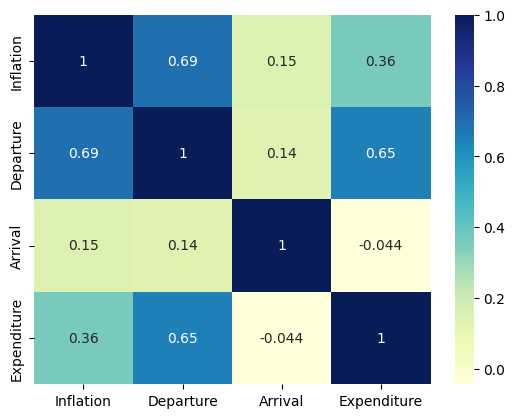

In [275]:
import seaborn as sb
dataplot = sb.heatmap(mainDf.corr(), cmap="YlGnBu", annot=True) 


In [296]:
mainDF1 = pd.read_csv('mainDF.csv')
mainDF1.corr()

,Year,Inflation,Departure,Arrival,Expenditure
Year,1.000000,0.577739,-0.538982,0.348677,-0.418176
Inflation,0.577739,1.000000,-0.810621,0.147953,-0.769284
Departure,-0.538982,-0.810621,1.000000,-0.437688,0.953882
Arrival,0.348677,0.147953,-0.437688,1.000000,-0.409351
Expenditure,-0.418176,-0.769284,0.953882,-0.409351,1.000000


<Axes: >

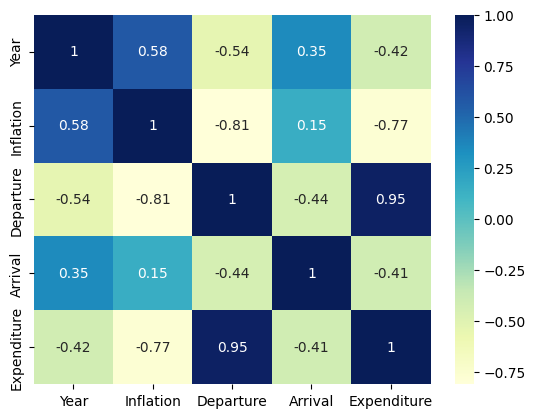

In [297]:
mainDF1
sb.heatmap(mainDF1.corr(), cmap="YlGnBu", annot=True) 
